<a href="https://colab.research.google.com/github/mehark56/flightnetworkanalysis/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import networkx as nx
G = nx.MultiDiGraph()

Read CSV File

In [ ]:
my_dataset = pd.read_csv('airlinedelaycauses_DelayedFlights.csv',  low_memory=False)

Print Dataset

In [ ]:
my_dataset

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132307,3773071,2008,7,11,5,1735.0,1727,1923.0,1904,OH,...,7.0,19.0,0,N,0,0.0,0.0,11.0,0.0,8.0
1132308,3773075,2008,7,1,2,1710.0,1704,1858.0,1839,OH,...,11.0,16.0,0,N,0,0.0,6.0,13.0,0.0,0.0
1132309,3773076,2008,7,11,5,833.0,825,1021.0,1000,OH,...,3.0,30.0,0,N,0,0.0,8.0,13.0,0.0,0.0
1132310,3773077,2008,7,21,1,835.0,825,1023.0,1000,OH,...,3.0,30.0,0,N,0,10.0,0.0,13.0,0.0,0.0


DATA PREPROCESSING

Column Removal

In [ ]:
my_dataset = my_dataset.drop(['Year','Month','DayofMonth','CRSDepTime','CRSArrTime','CRSElapsedTime','ArrDelay','DepDelay','Cancelled','CancellationCode','Diverted','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay','TaxiIn','TaxiOut','DayOfWeek'],axis=1)


In [ ]:
my_dataset

,Unnamed: 0,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,AirTime,Origin,Dest,Distance
0,0,2003.0,2211.0,WN,335,N712SW,128.0,116.0,IAD,TPA,810
1,1,754.0,1002.0,WN,3231,N772SW,128.0,113.0,IAD,TPA,810
2,2,628.0,804.0,WN,448,N428WN,96.0,76.0,IND,BWI,515
3,4,1829.0,1959.0,WN,3920,N464WN,90.0,77.0,IND,BWI,515
4,5,1940.0,2121.0,WN,378,N726SW,101.0,87.0,IND,JAX,688
...,...,...,...,...,...,...,...,...,...,...,...
1132307,3773071,1735.0,1923.0,OH,5430,N369CA,108.0,82.0,SRQ,ATL,445
1132308,3773075,1710.0,1858.0,OH,5638,N679CA,108.0,81.0,RIC,JFK,288
1132309,3773076,833.0,1021.0,OH,5365,N720SW,108.0,75.0,DCA,CVG,411
1132310,3773077,835.0,1023.0,OH,5365,N960CA,108.0,75.0,DCA,CVG,411


Drop Null Value Rows

In [ ]:
my_dataset = my_dataset.dropna()
#thresh=half_count,
my_dataset

,Unnamed: 0,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,AirTime,Origin,Dest,Distance
0,0,2003.0,2211.0,WN,335,N712SW,128.0,116.0,IAD,TPA,810
1,1,754.0,1002.0,WN,3231,N772SW,128.0,113.0,IAD,TPA,810
2,2,628.0,804.0,WN,448,N428WN,96.0,76.0,IND,BWI,515
3,4,1829.0,1959.0,WN,3920,N464WN,90.0,77.0,IND,BWI,515
4,5,1940.0,2121.0,WN,378,N726SW,101.0,87.0,IND,JAX,688
...,...,...,...,...,...,...,...,...,...,...,...
1132307,3773071,1735.0,1923.0,OH,5430,N369CA,108.0,82.0,SRQ,ATL,445
1132308,3773075,1710.0,1858.0,OH,5638,N679CA,108.0,81.0,RIC,JFK,288
1132309,3773076,833.0,1021.0,OH,5365,N720SW,108.0,75.0,DCA,CVG,411
1132310,3773077,835.0,1023.0,OH,5365,N960CA,108.0,75.0,DCA,CVG,411


Store Unique Airports Names In A List

In [ ]:
import pandas as pd # Import the pandas library

uniqueValues = pd.concat([my_dataset['Origin'], my_dataset['Dest']]).unique()
print(uniqueValues)

['IAD' 'IND' 'ISP' 'JAN' 'JAX' 'LAS' 'LAX' 'LBB' 'LIT' 'MAF' 'MCI' 'MCO'
 'MDW' 'MHT' 'MSY' 'OAK' 'OKC' 'OMA' 'ONT' 'ORF' 'PBI' 'PDX' 'PHL' 'PHX'
 'PIT' 'PVD' 'RDU' 'RNO' 'RSW' 'SAN' 'SAT' 'SDF' 'SEA' 'SFO' 'SJC' 'SLC'
 'SMF' 'SNA' 'STL' 'TPA' 'TUL' 'TUS' 'ABQ' 'ALB' 'AMA' 'AUS' 'BDL' 'BHM'
 'BNA' 'BOI' 'BUF' 'BUR' 'BWI' 'CLE' 'CMH' 'CRP' 'DAL' 'DEN' 'DTW' 'ELP'
 'FLL' 'GEG' 'HOU' 'HRL' 'ROC' 'ORD' 'EWR' 'SYR' 'IAH' 'CRW' 'FAT' 'COS'
 'MRY' 'LGB' 'BFL' 'EUG' 'ICT' 'MEM' 'BTV' 'MKE' 'LFT' 'BRO' 'PWM' 'MSP'
 'SRQ' 'CLT' 'CVG' 'GSO' 'SHV' 'DCA' 'TYS' 'GSP' 'RIC' 'DFW' 'BGR' 'DAY'
 'GRR' 'CHS' 'CAE' 'TLH' 'XNA' 'GPT' 'VPS' 'LGA' 'ATL' 'MSN' 'SAV' 'BTR'
 'LEX' 'LRD' 'MOB' 'MTJ' 'GRK' 'AEX' 'PNS' 'ABE' 'HSV' 'CHA' 'MFE' 'MLU'
 'DSM' 'MGM' 'AVL' 'LCH' 'BOS' 'MYR' 'CLL' 'DAB' 'ASE' 'ATW' 'BMI' 'CAK'
 'CID' 'CPR' 'EGE' 'FLG' 'FSD' 'FWA' 'GJT' 'GRB' 'HNL' 'KOA' 'LAN' 'LIH'
 'MBS' 'MDT' 'MFR' 'OGG' 'PSP' 'RAP' 'ROA' 'SBA' 'SBN' 'SPI' 'TEX' 'YUM'
 'AVP' 'CWA' 'DRO' 'ILM' 'ITO' 'JFK' 'TVC' 'HDN' 'S

In [ ]:
print(type(uniqueValues))

<class 'numpy.ndarray'>


In [ ]:
import pickle
with open('airport.pkl', 'wb') as m:
    pickle.dump(uniqueValues, m)

Declaring Node For Each Airport In The List

In [ ]:
for airport in uniqueValues:
    G.add_node(airport, name=airport)

Total No Of Nodes/Airports

In [ ]:
G.number_of_nodes()

298

Graphical Representation Of Nodes

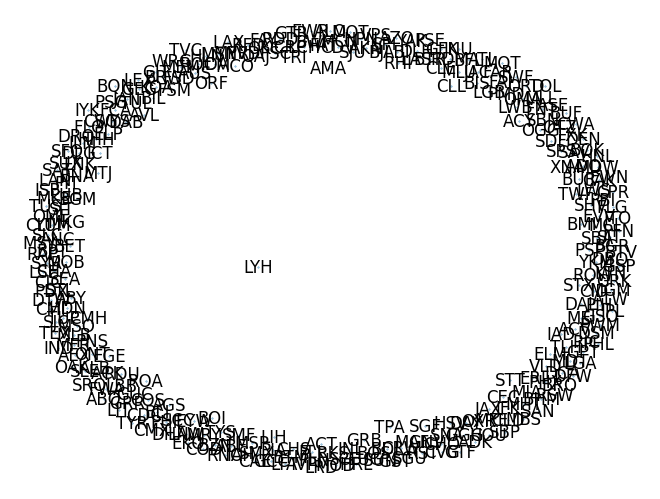

In [ ]:
nx.draw(G, with_labels=True ,node_size=0.1)

Making Edges Between The Airports With Weights As Min Time

In [ ]:
for flight in my_dataset.index:
    # print (my_dataset['FlightNum'][train])
    # G.add_edge(my_dataset['Origin'], my_dataset['Dest'], weight=my_dataset['ActualElapsedTime'])
    # G.add_edge(my_dataset['Origin'][train], my_dataset['Dest'][train], l=my_dataset['ActualElapsedTime'][train],flight=my_dataset['FlightNum'][train])

    if not G.has_edge(my_dataset['Origin'][flight], my_dataset['Dest'][flight]):
        G.add_edge(my_dataset['Origin'][flight], my_dataset['Dest'][flight], l=my_dataset['ActualElapsedTime'][flight],flight=my_dataset['FlightNum'][flight])
    elif G[my_dataset['Origin'][flight]][my_dataset['Dest'][flight]][0]["l"] > my_dataset['ActualElapsedTime'][flight]:
        G[my_dataset['Origin'][flight]][my_dataset['Dest'][flight]][0]["l"] = my_dataset['ActualElapsedTime'][flight]
        G[my_dataset['Origin'][flight]][my_dataset['Dest'][flight]][0]["flight"] = my_dataset['FlightNum'][flight]



# import networkx as nx
# G = nx.MultiDiGraph()
# G.add_edge("A", "B", weight=3)
# G.add_edge("A", "C", weight=10)
# G.edges(data=True)
# check if edge exists


# if G.has_edge("A", "B") and G["A"]["B"][0]["weight"] > 5:
#     G["A"]["B"][0]["weight"] = 5
# elif not G.has_edge("A", "B"):
#     G.add_edge("A", "B", weight=5)
    # continue
# nx.shortest_path(G, "A", "B", weight="weight")
# G.edges(data=True)

In [ ]:
G.number_of_edges()

5019

In [ ]:
G.number_of_nodes()

298

Graphical Representation

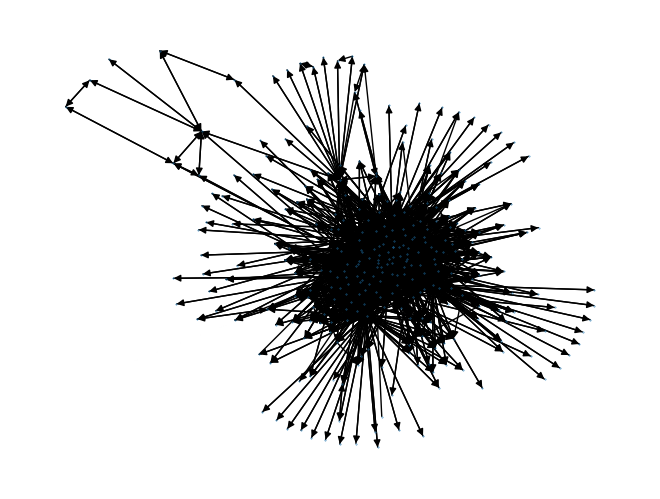

In [ ]:
nx.draw(G, with_labels=False , node_size=0.1)

In [ ]:
G.number_of_edges()

5019

Centrality Measures For Each Nodes

Degree Centrality (DC)

In [ ]:
nx.degree_centrality(G)

{'IAD': 0.4276094276094276,
 'IND': 0.2558922558922559,
 'ISP': 0.0606060606060606,
 'JAN': 0.08754208754208753,
 'JAX': 0.23569023569023567,
 'LAS': 0.6127946127946128,
 'LAX': 0.5858585858585859,
 'LBB': 0.04713804713804714,
 'LIT': 0.1212121212121212,
 'MAF': 0.04713804713804714,
 'MCI': 0.32996632996632996,
 'MCO': 0.5723905723905723,
 'MDW': 0.36363636363636365,
 'MHT': 0.11784511784511784,
 'MSY': 0.25252525252525254,
 'OAK': 0.2222222222222222,
 'OKC': 0.1919191919191919,
 'OMA': 0.15151515151515152,
 'ONT': 0.21548821548821548,
 'ORF': 0.16498316498316498,
 'PBI': 0.1616161616161616,
 'PDX': 0.27609427609427606,
 'PHL': 0.36026936026936024,
 'PHX': 0.5925925925925926,
 'PIT': 0.21885521885521886,
 'PVD': 0.1414141414141414,
 'RDU': 0.2895622895622896,
 'RNO': 0.14814814814814814,
 'RSW': 0.2222222222222222,
 'SAN': 0.36363636363636365,
 'SAT': 0.26936026936026936,
 'SDF': 0.17845117845117844,
 'SEA': 0.3737373737373737,
 'SFO': 0.4444444444444444,
 'SJC': 0.17845117845117844,
 

Betweenness Centrality

In [ ]:
nx.betweenness_centrality(G)

{'IAD': 0.006905878544887003,
 'IND': 0.0003135408887015053,
 'ISP': 6.6584874436263726e-06,
 'JAN': 2.7705526204420067e-05,
 'JAX': 0.0003003324520030872,
 'LAS': 0.02041954422858246,
 'LAX': 0.049970306756258076,
 'LBB': 2.5963713186359828e-05,
 'LIT': 0.00031100738604820005,
 'MAF': 2.74314565895871e-05,
 'MCI': 0.00181853279456911,
 'MCO': 0.017722725379774512,
 'MDW': 0.002104269982060348,
 'MHT': 4.722672538800078e-06,
 'MSY': 0.0005121796952395229,
 'OAK': 0.0009799159996776226,
 'OKC': 0.0006447566683553122,
 'OMA': 7.6168142258499e-05,
 'ONT': 0.0008642540738812426,
 'ORF': 6.401841620053722e-05,
 'PBI': 0.00045932918094421775,
 'PDX': 0.0034606097405814715,
 'PHL': 0.0018577425711975854,
 'PHX': 0.03305346855460578,
 'PIT': 0.0012619861153920493,
 'PVD': 5.660022235980385e-06,
 'RDU': 0.0002982601064056172,
 'RNO': 0.0002762027291780705,
 'RSW': 0.000626411762992704,
 'SAN': 0.0036105385834574785,
 'SAT': 0.0019788847939367846,
 'SDF': 0.00011558290823107568,
 'SEA': 0.038926

Top 10 Airports With Highest Degree

In [ ]:
l=list(G.degree(list(G.nodes())))
l.sort(key=lambda x: x[1], reverse=True)

In [ ]:

l[:10] #top 10 nodes with highest degree (stations with most number of flights)

[('ATL', 343),
 ('ORD', 292),
 ('DFW', 266),
 ('MSP', 247),
 ('DEN', 240),
 ('DTW', 233),
 ('IAH', 226),
 ('CVG', 215),
 ('SLC', 214),
 ('LAS', 182)]

Fligh

In [ ]:
G.edges('JAN')

OutMultiEdgeDataView([('JAN', 'BWI'), ('JAN', 'HOU'), ('JAN', 'MCO'), ('JAN', 'MDW'), ('JAN', 'EWR'), ('JAN', 'IAH'), ('JAN', 'CVG'), ('JAN', 'ATL'), ('JAN', 'DCA'), ('JAN', 'DFW'), ('JAN', 'ORD'), ('JAN', 'DTW'), ('JAN', 'MEM')])

In [ ]:
G.degree('JAN')

26

In [ ]:
for i in uniqueValues:
    print(i)

IAD
IND
ISP
JAN
JAX
LAS
LAX
LBB
LIT
MAF
MCI
MCO
MDW
MHT
MSY
OAK
OKC
OMA
ONT
ORF
PBI
PDX
PHL
PHX
PIT
PVD
RDU
RNO
RSW
SAN
SAT
SDF
SEA
SFO
SJC
SLC
SMF
SNA
STL
TPA
TUL
TUS
ABQ
ALB
AMA
AUS
BDL
BHM
BNA
BOI
BUF
BUR
BWI
CLE
CMH
CRP
DAL
DEN
DTW
ELP
FLL
GEG
HOU
HRL
ROC
ORD
EWR
SYR
IAH
CRW
FAT
COS
MRY
LGB
BFL
EUG
ICT
MEM
BTV
MKE
LFT
BRO
PWM
MSP
SRQ
CLT
CVG
GSO
SHV
DCA
TYS
GSP
RIC
DFW
BGR
DAY
GRR
CHS
CAE
TLH
XNA
GPT
VPS
LGA
ATL
MSN
SAV
BTR
LEX
LRD
MOB
MTJ
GRK
AEX
PNS
ABE
HSV
CHA
MFE
MLU
DSM
MGM
AVL
LCH
BOS
MYR
CLL
DAB
ASE
ATW
BMI
CAK
CID
CPR
EGE
FLG
FSD
FWA
GJT
GRB
HNL
KOA
LAN
LIH
MBS
MDT
MFR
OGG
PSP
RAP
ROA
SBA
SBN
SPI
TEX
YUM
AVP
CWA
DRO
ILM
ITO
JFK
TVC
HDN
SBP
CLD
HPN
MIA
SGF
TRI
SUN
SGU
SLE
MSO
BZN
YKM
GTF
BIL
JAC
MOD
FAR
GUC
AZO
PIA
MLI
LNK
FCA
IDA
BIS
PSC
COD
TWF
RDM
HLN
RDD
PIH
EKO
LWS
SMX
ACV
OXR
CEC
CIC
PMD
RFD
BTM
IYK
IPL
BLI
CDC
SJU
STT
ANC
STX
MLB
PHF
PFN
FAY
AGS
GNV
ABY
DHN
EVV
FNT
OAJ
TOL
SWF
EWN
MEI
GTR
LYH
HHH
EYW
VLD
CSG
ACY
FSM
MCN
CHO
FLO
BQK
SCE
TUP
TYR
LAW
SPS
ABI
GGG
ACT
SJT


Airport With Their Degrees

In [ ]:
dict={}
for i in uniqueValues:
    dict[i]=G.degree(i)
dict

{'IAD': 127,
 'IND': 76,
 'ISP': 18,
 'JAN': 26,
 'JAX': 70,
 'LAS': 182,
 'LAX': 174,
 'LBB': 14,
 'LIT': 36,
 'MAF': 14,
 'MCI': 98,
 'MCO': 170,
 'MDW': 108,
 'MHT': 35,
 'MSY': 75,
 'OAK': 66,
 'OKC': 57,
 'OMA': 45,
 'ONT': 64,
 'ORF': 49,
 'PBI': 48,
 'PDX': 82,
 'PHL': 107,
 'PHX': 176,
 'PIT': 65,
 'PVD': 42,
 'RDU': 86,
 'RNO': 44,
 'RSW': 66,
 'SAN': 108,
 'SAT': 80,
 'SDF': 53,
 'SEA': 111,
 'SFO': 132,
 'SJC': 53,
 'SLC': 214,
 'SMF': 72,
 'SNA': 51,
 'STL': 100,
 'TPA': 123,
 'TUL': 53,
 'TUS': 60,
 'ABQ': 78,
 'ALB': 32,
 'AMA': 13,
 'AUS': 101,
 'BDL': 67,
 'BHM': 61,
 'BNA': 93,
 'BOI': 33,
 'BUF': 42,
 'BUR': 27,
 'BWI': 126,
 'CLE': 147,
 'CMH': 67,
 'CRP': 8,
 'DAL': 34,
 'DEN': 240,
 'DTW': 233,
 'ELP': 36,
 'FLL': 108,
 'GEG': 34,
 'HOU': 65,
 'HRL': 10,
 'ROC': 32,
 'ORD': 292,
 'EWR': 179,
 'SYR': 28,
 'IAH': 226,
 'CRW': 11,
 'FAT': 21,
 'COS': 37,
 'MRY': 19,
 'LGB': 35,
 'BFL': 16,
 'EUG': 14,
 'ICT': 23,
 'MEM': 156,
 'BTV': 21,
 'MKE': 95,
 'LFT': 6,
 'BRO':

In [ ]:
df =pd.DataFrame(nx.adjacency_matrix(G, weight="l").todense(), index=G.nodes(), columns=G.nodes())
df

,IAD,IND,ISP,JAN,JAX,LAS,LAX,LBB,LIT,MAF,...,MKG,DLG,AKN,LWB,ACK,WYS,BJI,INL,GST,PUB
IAD,0.0,0.0,0.0,0.0,97.0,275.0,292.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IND,0.0,0.0,0.0,0.0,90.0,212.0,255.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ISP,0.0,0.0,0.0,0.0,0.0,303.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JAX,88.0,104.0,0.0,0.0,0.0,266.0,324.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WYS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BJI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
INL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GST,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Saving Shorted Distance Matrix

In [ ]:
import pickle
dbfile = open('df', 'ab')
pickle.dump(df, dbfile)
dbfile.close()

# dbfile = open('examplePickle', 'rb')
# G = pickle.load(dbfile)
# dbfile.close()

In [ ]:
dbfile = open('df', 'rb')
df2 = pickle.load(dbfile)
dbfile.close()

In [ ]:
df2

,IAD,IND,ISP,JAN,JAX,LAS,LAX,LBB,LIT,MAF,...,CIC,PMD,RFD,BTM,IYK,IPL,BLI,CDC,BPT,MLB
IAD,0.0,0.0,0.0,0.0,100.0,322.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IND,0.0,0.0,0.0,0.0,101.0,229.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ISP,0.0,0.0,0.0,0.0,0.0,336.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JAX,90.0,119.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IPL,0.0,0.0,0.0,0.0,0.0,0.0,59.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BLI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CDC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BPT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
o=nx.shortest_path_length(G, source="IAD", target="IND", weight="l")
o

113.0

In [ ]:
shortestPathByDistanceTimeDF =pd.DataFrame( index=G.nodes(), columns=G.nodes())
for i in G.nodes():
    for j in G.nodes():
        if i==j:
            continue
        lst=[]
        # try:
        #     lst.append(nx.shortest_path_length(G, source=i, target=j, weight="distance"))
        # except nx.NetworkXNoPath:
        #     lst.append(None)
        try:
            lst.append(nx.shortest_path_length(G, source=i, target=j, weight="l"))
        except nx.NetworkXNoPath:
            lst.append(None)

        shortestPathByDistanceTimeDF.loc[i,j] = lst

SHORTEST PATH DISTANCE

In [ ]:
shortestPathByDistanceTimeDF

SHORTEST PATH

In [ ]:
import networkx as nx

# Check if the nodes exist in the graph, considering case sensitivity
source_node = "lmt"
target_node = "pir"

# Check if both source and target nodes are in the graph
if source_node in G.nodes() and target_node in G.nodes():
    try:
        # Calculate the shortest path using lowercase node names
        p = nx.shortest_path(G, source=source_node, target=target_node, weight="l")
        print(f"The shortest path from {source_node} to {target_node} is: {p}")
    except nx.NetworkXNoPath:
        print(f"No path exists between {source_node} and {target_node}.")
    except nx.NodeNotFound as e:
        print(f"NodeNotFound error: {e}")
else:
    missing_nodes = [node for node in [source_node, target_node] if node not in G.nodes()]
    print(f"Node(s) not found in the graph: {', '.join(missing_nodes)}")


In [ ]:
import pickle
with open('graph.pkl', 'wb') as m:
    pickle.dump(G, m)

In [ ]:
n = 20
k = 4
p = 0.3
seed = 42

G8 = nx.watts_strogatz_graph(n, k, p, seed=seed)

# Draw the graph using the default layout
nx.draw(G8, with_labels=True)

In [ ]:
nodes = [1, 2, 3, 4, 5]
# Create a subgraph from the selected nodes
subgraph = G.subgraph(nodes)

# Draw the original graph and the subgraph side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

nx.draw(G, ax=ax1, with_labels=True)
ax1.set_title('Original Graph')

nx.draw(subgraph, ax=ax2, with_labels=True)
ax2.set_title('Subgraph')

plt.show()

In [ ]:
import networkx as nx
G_simple = nx.Graph(G)

# Find the cycle basis of the graph
cycle_basis = nx.cycle_basis(G_simple, root="ATL")

# Print the cycle basis
print(len(cycle_basis))

In [ ]:
G0 = nx.Graph(G)
efficiency = nx.efficiency(G0, "ATL", "YUM")

# Print the efficiency
print(efficiency)

In [ ]:
#CSV To Dataframe
import pandas as pd
station_code = pd.read_csv('US-Airport-Codes.csv',  low_memory=False)
station_code

In [ ]:
import csv
airport_name={}
with open ('US-Airport-Codes.csv', mode='r') as f:
    data = csv.reader(f)
    airport_name={rows[1].strip():rows[0].strip() for rows in data}
print(type(airport_name))

In [ ]:
print(airport_name)

In [ ]:
import pickle
with open('airport_code.pkl', 'wb') as f:
    pickle.dump(airport_name, f)

In [ ]:
import csv

airport_name = {}
with open('US-Airport-Codes.csv', mode='r') as f:
    data = csv.reader(f)
    # Skip the header row
    next(data)
    airport_name = {rows[1].strip(): rows[0].strip() for rows in data}

print(airport_name['ATL'])  # Access without trailing space

In [ ]:
option1='Atlanta Hartsfield International Airport'
option2='Indianapolis International Airport'
# p = nx.shortest_path(G,source=[i for i in airport_name if airport_name[i]==option1][0],target=[i for i in airport_name if airport_name[i]==option2][0], weight="l")
p=nx.shortest_path(G,source='ATL',target='IND',weight="l")
print(p)
source=[i for i in airport_name if airport_name[i]=="Atlanta Hartsfield International Airport "]
target=[i for i in airport_name if airport_name[i]=="Indianapolis International Airport "]
print(source)
print(target)

In [ ]:
#Remove Spaces from Airport Codes
# for i in airport_name:

#     airport_name[i]=airport_name[i].strip()
# print(airport_name)
#Remove Spaces from Airport Codes
# for i in airport_name:
#     #Remove Spaces from Airport Codes keys
#     airport_name[i.strip()]=airport_name[i]
# print(airport_name)
print(airport_name['ATL']) # Remove trailing space from key
for i in airport_name:
    #Remove Spaces from Airport Codes keys
    airport_name[i.strip()]=airport_name[i]
print(airport_name)


In [ ]:
import csv
airport_name={}
with open ('US-Airport-Codes.csv', mode='r') as f:
    data = csv.reader(f)
    state_name={rows[1].strip():rows[2].strip() for rows in data}
print(state_name)

In [ ]:
import pickle
with open('state_code.pkl', 'wb') as f:
    pickle.dump(state_name, f)

In [ ]:
state_name.values()

In [ ]:
#Degree Of Particular Node
G.degree('ATL')

In [ ]:
temp={}
for z in state_name:
    if state_name[z]=='Alabama':
        temp[z]=G.degree(z)
temp

In [ ]:
#Store Unique States
uniqueValues = set(state_name.values())
type(uniqueValues)
type(list(uniqueValues))

In [ ]:
with open('graph.pkl', 'rb') as c:
    nod = pickle.load(c)

In [ ]:
!pip install streamlit
import streamlit as st

temp={}
for z in state_name:
    if state_name[z]=='Alabama':
        temp[z]=nod.degree(z)
temp
st.write(temp) # Use st.write to display the dictionary in streamlit
# Put Dictionary in Dataframe
df = pd.DataFrame.from_dict(temp, orient='index', columns=['Degree'])
# Print table
st.write(df) # Use st.write to display the DataFrame in streamlit

In [ ]:
import csv
airport_name={}
with open ('US-STATE.csv', mode='r') as f:
    data = csv.reader(f)
    state_name2={rows[1].strip():rows[0].strip() for rows in data}
print(state_name2)

In [ ]:
import pickle
with open('state_name2.pkl', 'wb') as f:
    pickle.dump(state_name2, f)

In [ ]:
list(state_name2.values())

In [ ]:
state_name2

In [ ]:
import pickle
with open('nearairport.pkl', 'wb') as m:
    pickle.dump(shortestPathByDistanceTimeDF, m)

In [ ]:
print(type(shortestPathByDistanceTimeDF))

In [ ]:
shortestPathByDistanceTimeDF

In [ ]:
import pandas as pd

# Convert all values in the series to numeric, forcing errors to NaN
series = pd.to_numeric(shortestPathByDistanceTimeDF['ATL'], errors='coerce')

# Drop NaN values
n = series.dropna().sort_values().head(100)

# Convert series to dictionary
n_dict = n.to_dict()

# Convert all float values in the dictionary to int
blank = {}
for key, value in n_dict.items():
    if pd.notna(value):  # Check if value is not NaN
        blank[key] = int(value)
    else:
        blank[key] = None

# Convert dictionary to DataFrame
df = pd.DataFrame.from_dict(blank, orient='index', columns=['Distance'])

print(df)
